In [ ]:
pip install statsmodels 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error
import pandas_datareader as pdr
import yfinance as yf
yf.pdr_override()
from datetime import datetime
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
start_date = '2000-01-01'
end_date = '2019-12-31'
import pmdarima as auto_arima


nasdaq_data = pdr.data.get_data_yahoo('^IXIC', start=start_date, end=end_date)
nasdaq_data = nasdaq_data[['High', 'Low', 'Open', 'Close', 'Volume']]
train_data = nasdaq_data.loc[start_date:'2017-12-31']
test_data = nasdaq_data.loc['2018-01-01':end_date]

arima_model = auto_arima(train_data['Close'])
arima_model.summary()
# plot data1 in black
plt.figure(figsize=(24, 10))
plt.plot(train_data['Close'], color='black', label='train_data')

# plot data2 in green
plt.plot(test_data['Close'], color='green', label='test_data')

# set axis labels and legend
plt.xlabel('Date')
plt.ylabel('Close')
plt.legend()

# show the plot
plt.show()

[*********************100%***********************]  1 of 1 completed


TypeError: ignored

Mean Squared Error: 8723.30165007773


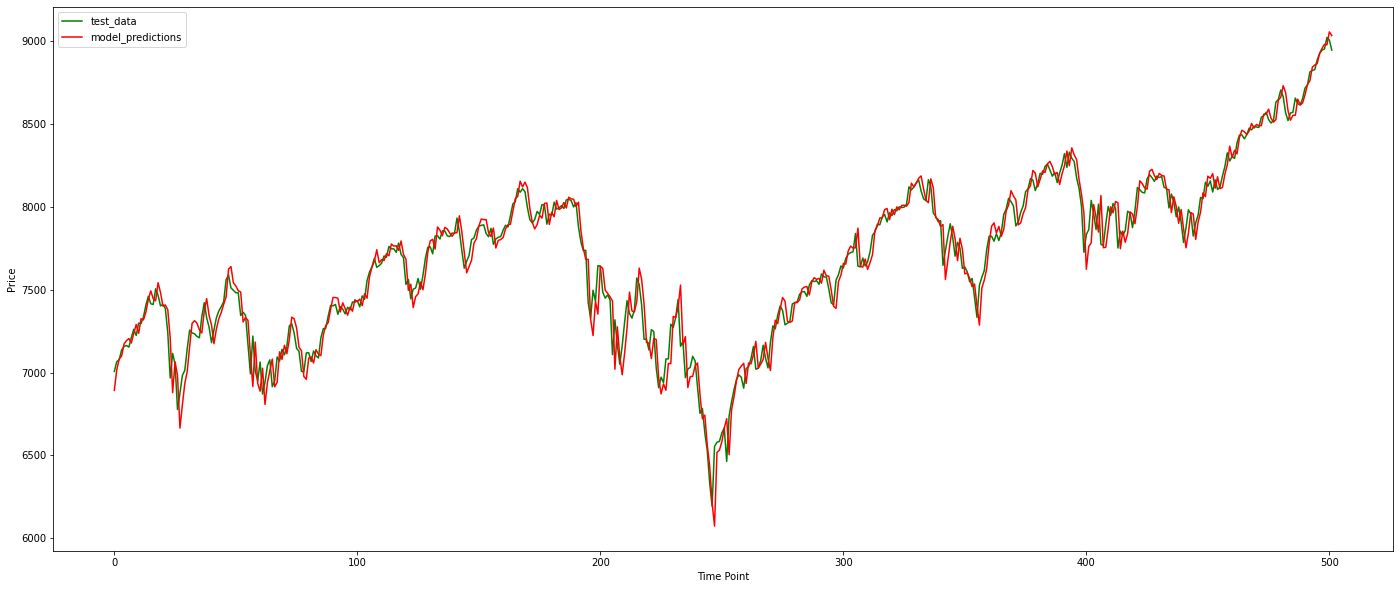

In [18]:



# Initialize a list to store the predicted prices
predictions = []

training_data = train_data['Close'].values
test_data = test_data['Close'].values
history = [x for x in training_data]
model_predictions = []
N_test_observations = len(test_data)
for time_point in range(N_test_observations):
    model = sm.tsa.arima.ARIMA(history, order=(5,2,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions.append(yhat)
    true_test_value = test_data[time_point]
    history.append(true_test_value)


# Print the mean squared error of the model predictions
mse = mean_squared_error(test_data, model_predictions)
print("Mean Squared Error:", mse)

# Plot the test_data along with the model_predictions in a graph
plt.figure(figsize=(24, 10))
plt.plot(test_data, color='green', label='test_data')
plt.plot(model_predictions, color='red', label='model_predictions')
plt.xlabel('Time Point')
plt.ylabel('Price')
plt.legend()
plt.show()




In [ ]:
print(len(test_data), len(model_predictions))

502 502


In [ ]:
preds = 0
actual = 0
for i in range(len(test_data)):
  preds += model_predictions[i]
  actual += test_data[i]

print(preds)
print(actual)
tot = preds -actual
print(tot)
res = tot/len(test_data)

print(res)


3855791.749119856
3855855.4111328125
-63.662012956570834
-0.12681675887763114


TypeError: ignored

This summary provides information about the fitted ARIMA model. Here are some of the key elements you can interpret:

Dep. Variable: y: This indicates the name of the dependent variable (in this case, the closing price of the NASDAQ stock).
No. Observations: This shows the number of observations in the training data set used to fit the model.
Model: SARIMAX(5, 2, 0): This indicates that the model used is a seasonal ARIMA model with five AR lags and two differences.
Log Likelihood: This is the value of the log-likelihood function at the estimated parameter values. Higher values indicate a better fit.
AIC, BIC, and HQIC: These are information criteria that measure the relative quality of the model. Lower values indicate a better fit.
Coefficients: These are the estimated coefficients of the ARIMA model, including the intercept and the AR terms. Each coefficient has a standard error, z-value, and p-value. The p-value indicates whether the coefficient is significantly different from zero (a p-value less than 0.05 is often used as a threshold for statistical significance).
sigma2: This is the estimate of the variance of the error term in the ARIMA model.
Ljung-Box (L1) (Q): This is a test for the presence of autocorrelation in the residuals of the model. A p-value less than 0.05 indicates evidence of autocorrelation.
Jarque-Bera (JB): This is a test for normality of the residuals. A p-value less than 0.05 indicates evidence of non-normality.
Heteroskedasticity (H): This is a test for heteroskedasticity (non-constant variance) of the residuals. A p-value less than 0.05 indicates evidence of heteroskedasticity.
The warnings indicate that the covariance matrix was calculated using the outer product of gradients (complex-step). This is not a serious issue but may affect the accuracy of the standard errors and p-values of the coefficients.

[*********************100%***********************]  1 of 1 completed


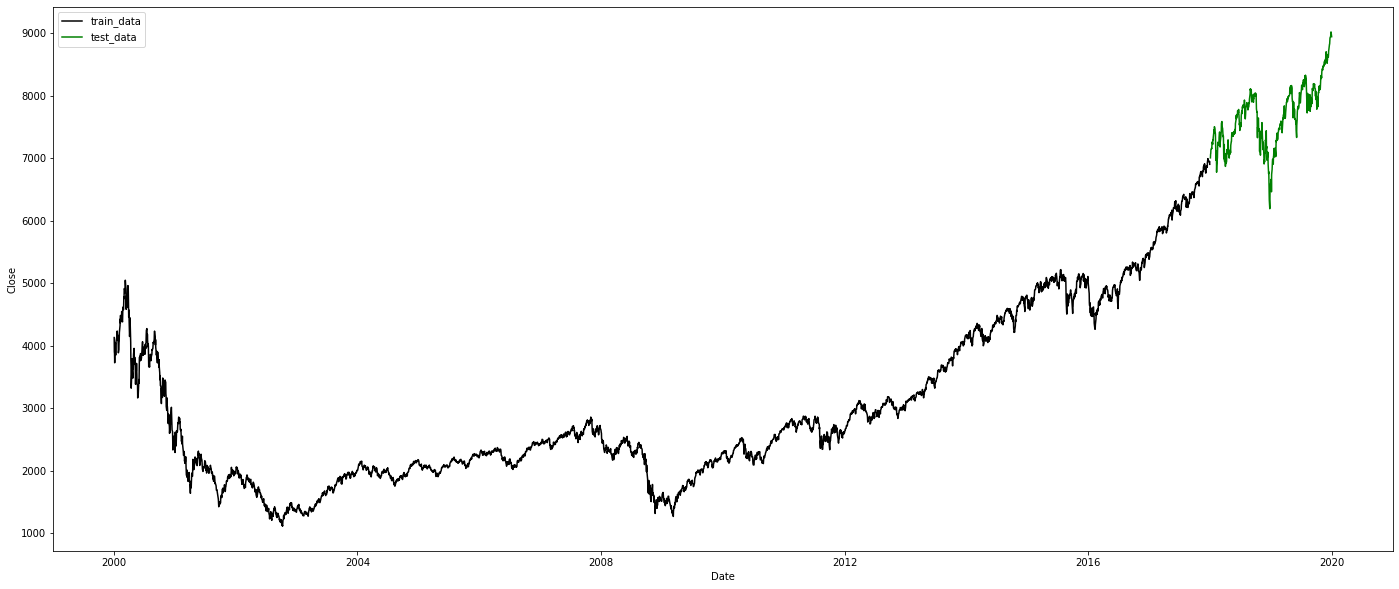

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 4528
Model:               SARIMAX(5, 2, 0)   Log Likelihood              -23895.960
Date:                Tue, 21 Mar 2023   AIC                          47803.921
Time:                        18:49:34   BIC                          47842.427
Sample:                             0   HQIC                         47817.485
                               - 4528                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8237      0.007   -115.868      0.000      -0.838      -0.810
ar.L2         -0.6766      0.010    -70.473      0.000      -0.695      -0.658
ar.L3         -0.5074      0.010    -49.763      0.000      -0.527      -0.487
ar.L4         -0.3139      0.010    -32.649      0.000      -0.333      -0.295
ar.L5         -0.1494      0.007    -21.542      0.000      -0.163      -0.136
sigma2      2256.7624     21.101    106.949      0.000    2215.405    2298.120
===================================================================================
Ljung-Box (L1) (Q):                   2.81   Jarque-Bera (JB):             13175.25
Prob(Q):                              0.09   Prob(JB):                         0.00
Heteroskedasticity (H):               0.53   Skew:                             0.61
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.27
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error
import pandas_datareader as pdr
import yfinance as yf
yf.pdr_override()
from datetime import datetime
from sklearn.metrics import mean_squared_error
import pmdarima as auto_arima
start_date = '2000-01-01'
end_date = '2019-12-31'



nasdaq_data = pdr.data.get_data_yahoo('^IXIC', start=start_date, end=end_date)
nasdaq_data = nasdaq_data[['Close']]
train_data = nasdaq_data.loc[start_date:'2017-12-31']
test_data = nasdaq_data.loc['2018-01-01':end_date]
# plot data1 in black
plt.figure(figsize=(24, 10))
plt.plot(train_data['Close'], color='black', label='train_data')

# plot data2 in green
plt.plot(test_data['Close'], color='green', label='test_data')

# set axis labels and legend
plt.xlabel('Date')
plt.ylabel('Close')
plt.legend()

# show the plot
plt.show()


# Fit an ARIMA model to the training data using the auto_arima function
arima_model = auto_arima.auto_arima(train_data['Close'])
arima_model.summary()






[*********************100%***********************]  1 of 1 completed
Mean Squared Error: 25713.22309561644


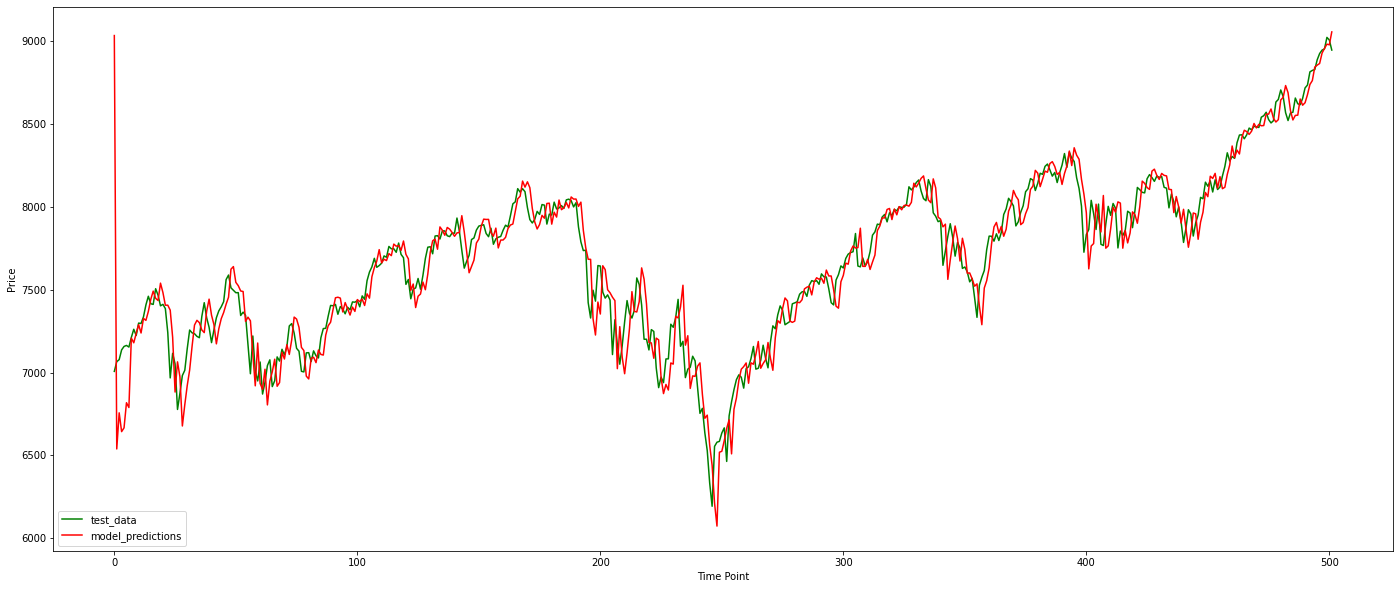

In [16]:
# Iterate through the test data and make day-by-day forecasts
start_date = '2000-01-01'
end_date = '2019-12-31'



nasdaq_data = pdr.data.get_data_yahoo('^IXIC', start=start_date, end=end_date)
nasdaq_data = nasdaq_data[['Close']]
train_data = nasdaq_data.loc[start_date:'2017-12-31']
test_data = nasdaq_data.loc['2018-01-01':end_date]
# Iterate through the test data and make day-by-day forecasts
predictions = []
actual = []

current_day_data = train_data.iloc[-1] 

for i in range(len(test_data)):
    
    # Make a forecast for the current day using the updated model and current day's data point
    forecast = arima_model.predict(n_periods=1)
    
    # Save the forecast and update the model with the current day's data point
    predictions.append(forecast[0])
    arima_model.update(current_day_data)
    
    # Get the current day's data point
    current_day_data = test_data.iloc[i]

    # Save the actual value for the current day
    actual.append(current_day_data)
    


# Calculate the mean squared error
mse = mean_squared_error(actual, predictions)
print("Mean Squared Error:", mse)

# Plot the test_data along with the model_predictions in a graph
plt.figure(figsize=(24, 10))
plt.plot(actual, color='green', label='test_data')
plt.plot(predictions, color='red', label='model_predictions')
plt.xlabel('Time Point')
plt.ylabel('Price')
plt.legend()
plt.show()